In [1]:
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] - '3'

In [2]:
import numpy as np

import tensorflow as tf
import scipy
from tensorflow.keras import layers, Sequential

In [3]:
abnormal_train = os.path.join(r"C:\Users\Admin\Downloads\TRAIN-20211013T135302Z-001\TRAIN\ABNORMAL")
normal_train = os.path.join(r"C:\Users\Admin\Downloads\TRAIN-20211013T135302Z-001\TRAIN\NORMAL")

abnormal_test = os.path.join(r"C:\Users\Admin\Downloads\TRAIN-20211013T135302Z-001\TRAIN\ABNORMAL")
normal_test = os.path.join(r"C:\Users\Admin\Downloads\TRAIN-20211013T135302Z-001\TEST\NORMAL")

In [4]:
train_abnormal_names = os.listdir(abnormal_train)
train_normal_names = os.listdir(normal_train)

test_abnormal_names = os.listdir(abnormal_test)
test_normal_names = os.listdir(normal_test)

In [5]:
print('Total training abnormal images: ', len(train_abnormal_names))
print('Total training normal images: ', len(train_normal_names))
print('Total testing abnormal images: ', len(test_abnormal_names))
print('Total testing normal images: ', len(test_normal_names))

Total training abnormal images:  59
Total training normal images:  22
Total testing abnormal images:  59
Total testing normal images:  6


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Parameters for our graph; we'll output imagesin a 4x4 configuration
nrows = 2
ncols = 5

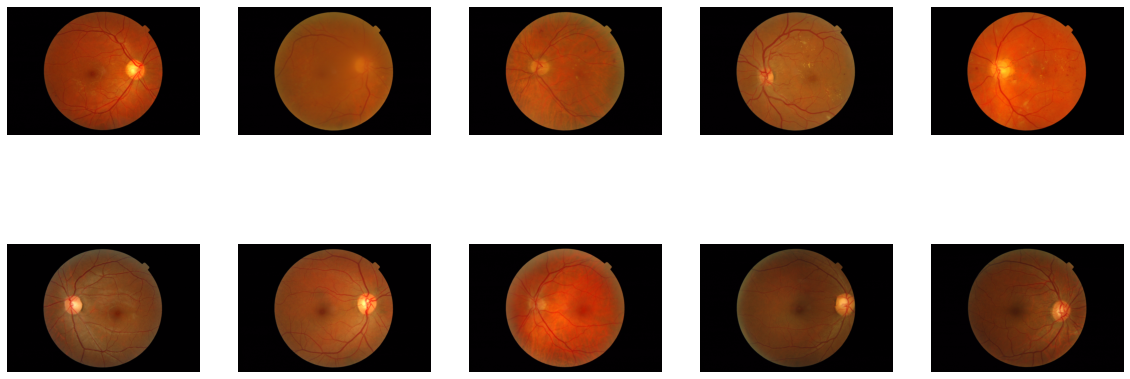

In [7]:
# Set up matplotlib fig and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

train_abnormal = [os.path.join(abnormal_train, fname) for fname in np.random.choice(train_abnormal_names, 4, replace = False)]
train_normal = [os.path.join(normal_train, fname) for fname in np.random.choice(train_normal_names, 4, replace = False)]

test_abnormal = [os.path.join(abnormal_test, str(np.random.choice(test_abnormal_names)))]
test_normal = [os.path.join(normal_test, str(np.random.choice(test_normal_names)))]

for i, img_path in enumerate(train_abnormal + test_abnormal + train_normal + test_normal) :
    #set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows,ncols,i+1)
    sp.axis('off') # Don't show axes
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'C:/Users/Admin/Downloads/TRAIN-20211013T135302Z-001/TRAIN/',  # This is the source directory for training images
        target_size=(600, 600),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


# Flow training images in batches of 128 using train_datagen generator
test_generator = train_datagen.flow_from_directory(
        'C:/Users/Admin/Downloads/TRAIN-20211013T135302Z-001/TEST/',  # This is the source directory for training images
        target_size=(600, 600),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 81 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [9]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(600, 600, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('normal') and 1 for the other ('abnormal')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 598, 598, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 299, 299, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 297, 297, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 148, 148, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 73, 73, 64)       0

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr = 0.1),
             metrics = ['accuracy'])

In [13]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch = 2,
        epochs = 2,
        verbose = 1)

Epoch 1/2
2/2 [==============================] - 403s 12s/step - loss: 0.6898 - accuracy: 0.7284


In [14]:
pred = model.predict_generator(test_generator)

In [15]:
pred.astype(int)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [16]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [17]:
history.history

{'loss': [0.6897844672203064], 'accuracy': [0.7283950448036194]}